In [2]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

**Start at:** Saturday 30 September 2023, 22:15:51  
**Hostname:** 20017201014f403ff360169b83811df.ipv6.eduroam.uv.es (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

## Annexes / *Appendixes*

### A. Pandas et corrélation de données

**La première partie a pour but de créer des données au format pandas. Certaines sont corrélées entre elles. On va vérifier que la carte thermique est cohérente avec les corrélations**


Création des données. Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter

In [2]:
%matplotlib inline
import numpy as np 
import seaborn as sns
from pylab import *
import random
sns.set_style("ticks")

def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,nbp)
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f0(x):
    return 50
def f1(x):
    return 3*x
def f2(x):
    return -5*x
def f3(x):
    return x**2
def f4(x):
    return sin(x)*50
def f5(x):
    return cos(x)*50

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
#print(X)
data0 = noiseF(f0,X)
data1 = noiseF(f1,X)
data2 = noiseF(f2,X)
data3 = noiseF(f3,X)
data4 = noiseF(f4,X)
data5 = noiseF(f5,X)

On va tracer les 4 fonctions pour voir à quoi elles ressemblent.  Vérifier de visu que les distributions de points sont cohérentes avec les expressions des fonctions

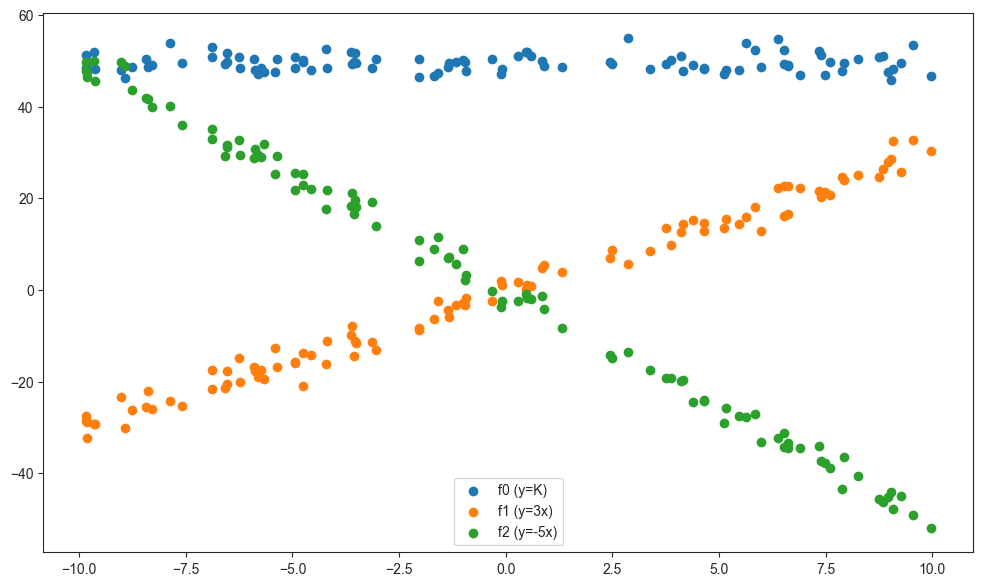

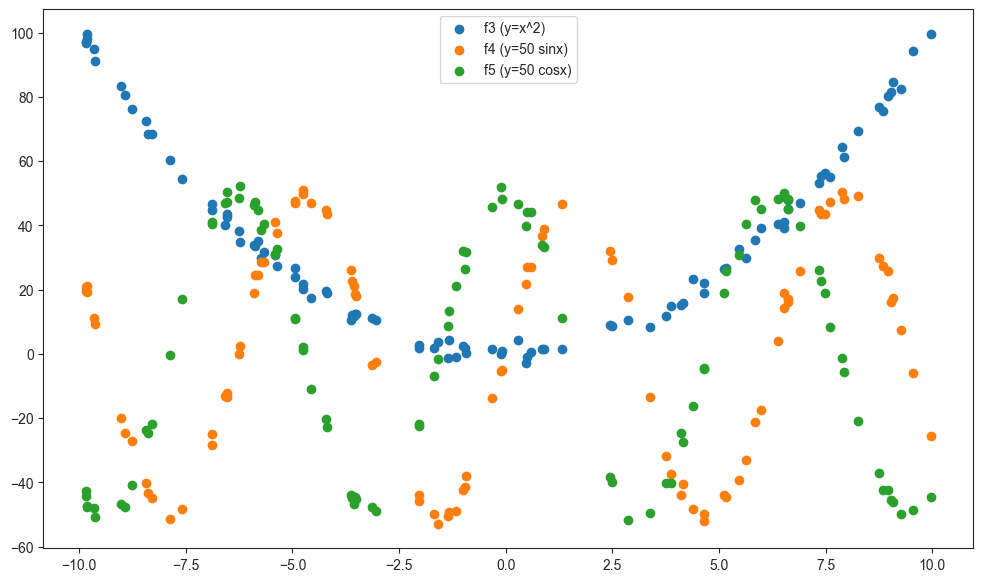

In [3]:
plt.rcParams["figure.figsize"] = (12,7) #on ajuste la taille du graphique
scatter(data0[:,0],data0[:,1],label='f0 (y=K)')
scatter(data1[:,0],data1[:,1],label='f1 (y=3x)')
scatter(data2[:,0],data2[:,1],label='f2 (y=-5x)')
legend(loc="lower center")
plt.show()
scatter(data3[:,0],data3[:,1],label='f3 (y=x^2)')
scatter(data4[:,0],data4[:,1],label='f4 (y=50 sinx)')
scatter(data5[:,0],data5[:,1],label='f5 (y=50 cosx)')
legend(loc="upper center")
plt.show()

On va maintenant stocker ces données au format pandas. La 1ère colonne du tableau `df` va contenir les valeurs de x, et les suivantes les valeurs que prennent les fonctions f0, f1, ... pour chacune des valeurs de x

In [4]:
import pandas as pd
df = pd.DataFrame(data0, columns = ['x','f0 (y=K)'])
df['f1 (y=3x)'] = pd.DataFrame(data1[:,1])
df['f2 (y=-5x)'] = pd.DataFrame(data2[:,1])
df['f3 (y=x^2)'] = pd.DataFrame(data3[:,1])
df['f4 (y=50 sinx)'] = pd.DataFrame(data4[:,1])
df['f5 (y=50 cosx)'] = pd.DataFrame(data5[:,1])

<div class="rq">Maintenant, à vous de jouer</div> 
(1) afficher le tableau `df`, qui contient les données

In [5]:
display(df)

,x,f0 (y=K),f1 (y=3x),f2 (y=-5x),f3 (y=x^2),f4 (y=50 sinx),f5 (y=50 cosx)
0,-0.923858,47.779186,-1.776592,3.233748,0.223744,-37.880984,31.721216
1,-5.910642,50.499536,-16.878199,28.853463,33.901738,18.905270,46.465578
2,-5.873515,48.037380,-17.667954,30.725356,33.518223,24.500515,47.167937
3,-4.755016,50.101432,-13.684302,25.203595,21.818917,50.923985,1.209425
4,5.168835,47.961506,15.575809,-25.685049,26.811558,-44.391100,25.876463
...,...,...,...,...,...,...,...
95,-9.810223,49.505633,-32.358891,47.604205,97.974254,19.268307,-47.462702
96,-5.666719,47.644568,-19.413436,31.794998,31.625315,28.510759,40.541109
97,7.342916,52.090677,21.683762,-34.056914,53.096426,44.770547,26.063529
98,-1.001378,50.171586,-2.844309,8.975674,2.620494,-42.217333,31.957898


(2) Afficher un aperçu de la distribution statistique des données

In [6]:
display(df.describe())

,x,f0 (y=K),f1 (y=3x),f2 (y=-5x),f3 (y=x^2),f4 (y=50 sinx),f5 (y=50 cosx)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.367519,49.585933,-1.246628,1.611668,36.105746,1.519172,1.151073
std,6.036839,1.900546,18.379823,30.423820,30.449817,33.773230,37.338287
min,-9.848136,45.840538,-32.358891,-51.887643,-2.802574,-52.865877,-51.631381
25%,-5.685615,48.225872,-17.000580,-27.218238,10.617274,-32.224019,-40.227325
50%,-0.976964,49.472880,-2.655290,4.462540,30.242060,12.601174,1.686626
75%,5.246561,50.741213,14.837743,29.075931,55.673097,27.060604,40.062558
max,9.970632,55.028053,32.746468,49.979848,99.667946,50.923985,52.206798


(3) Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot`)

/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

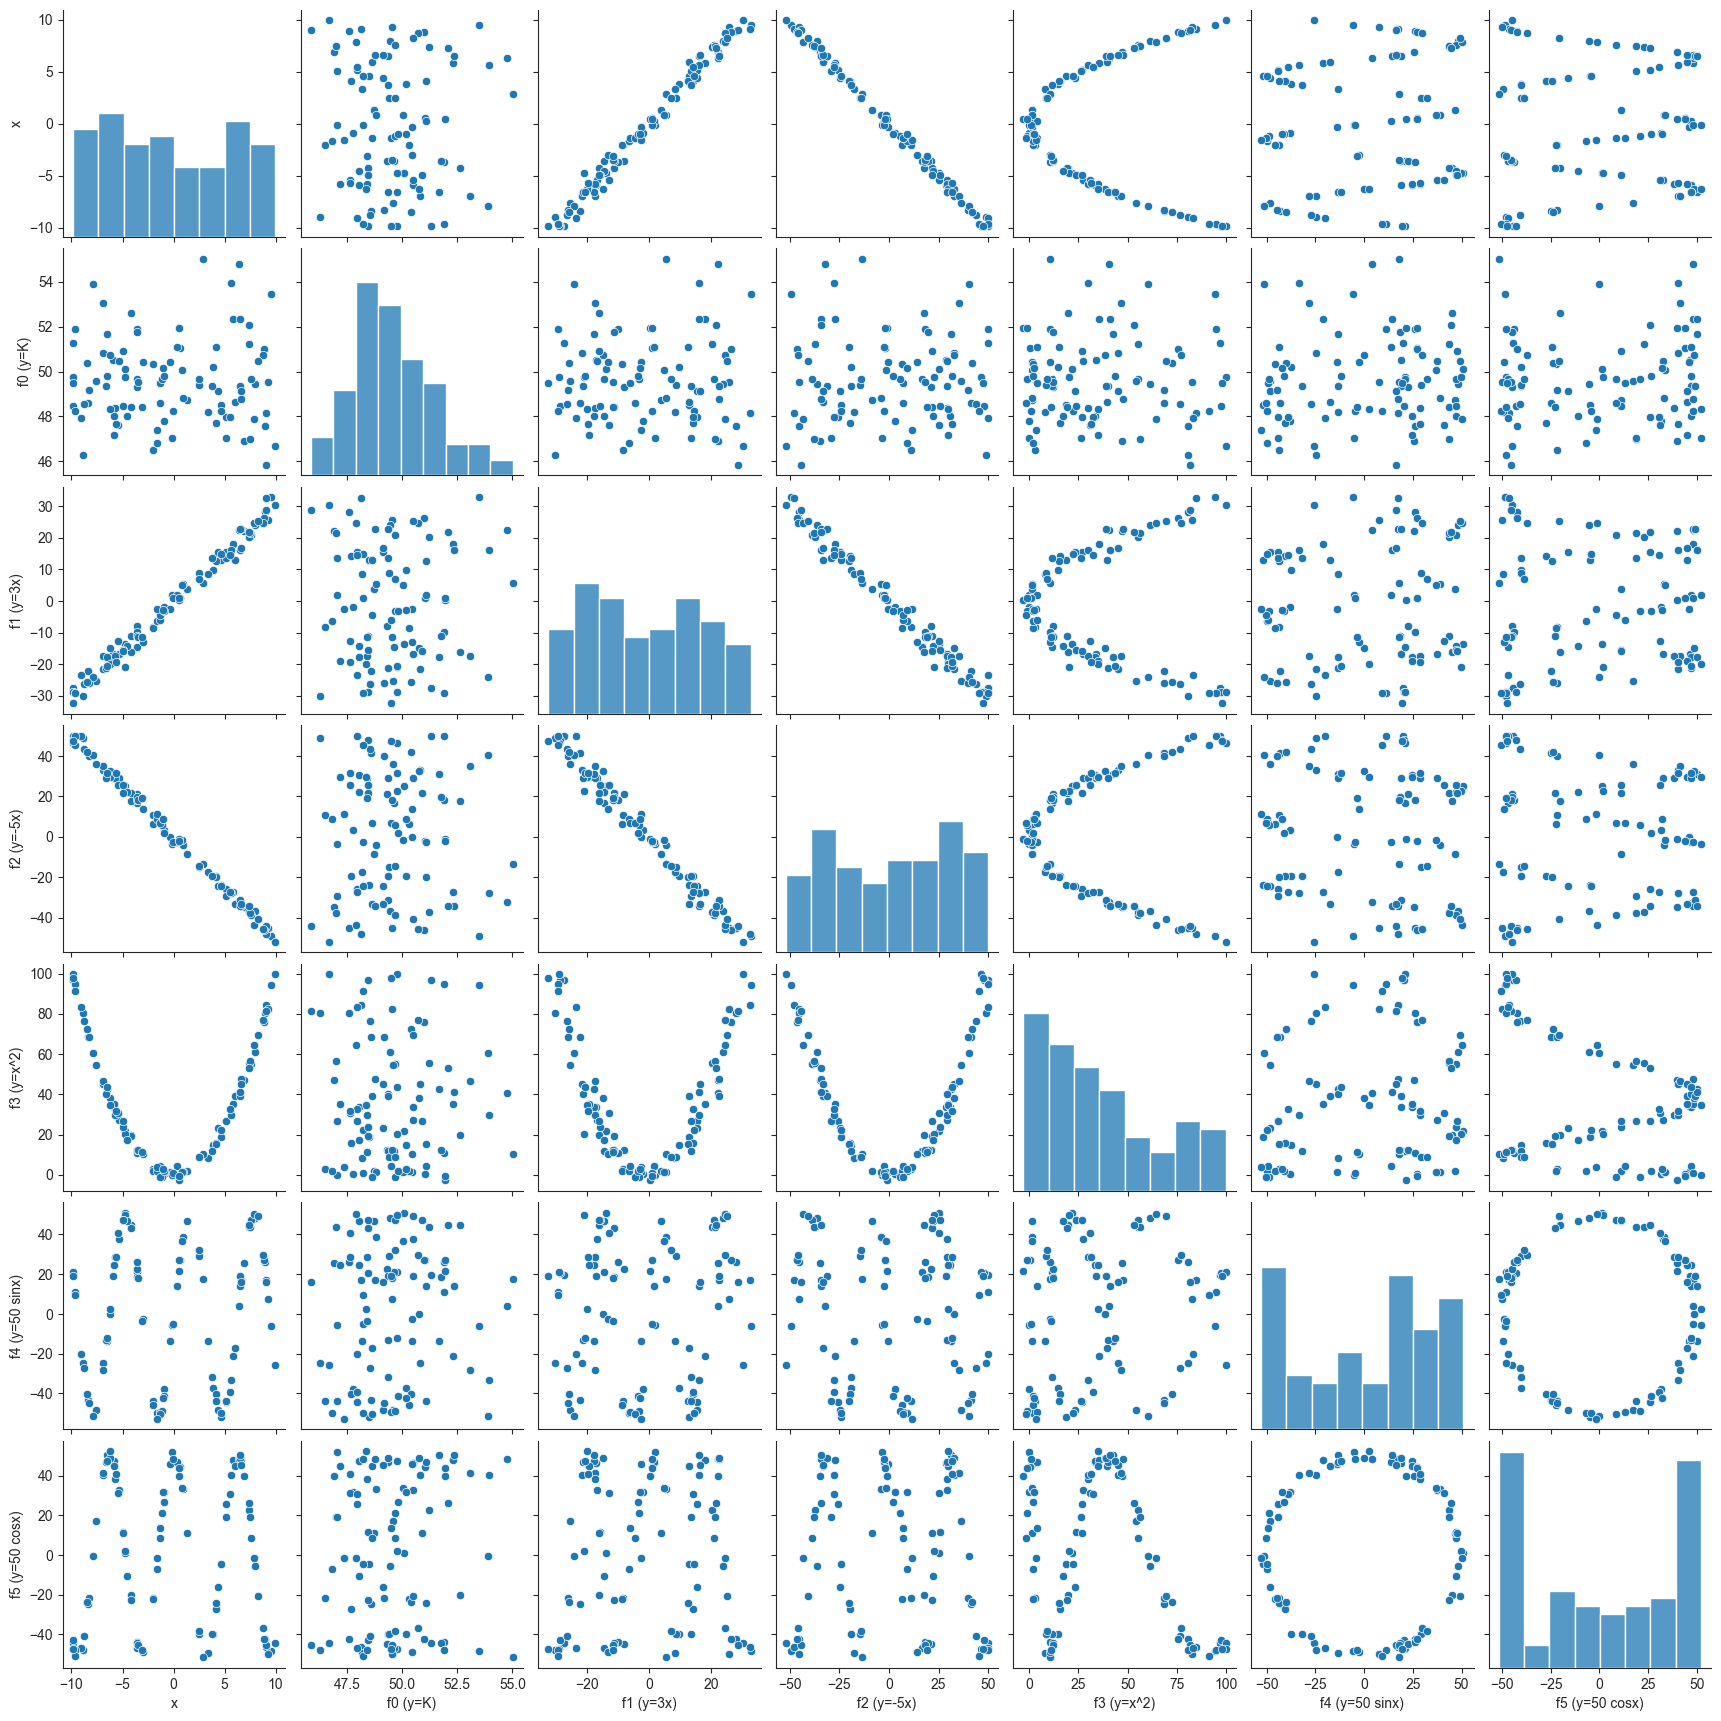

In [7]:
sns.pairplot(df)

(4) Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap`)

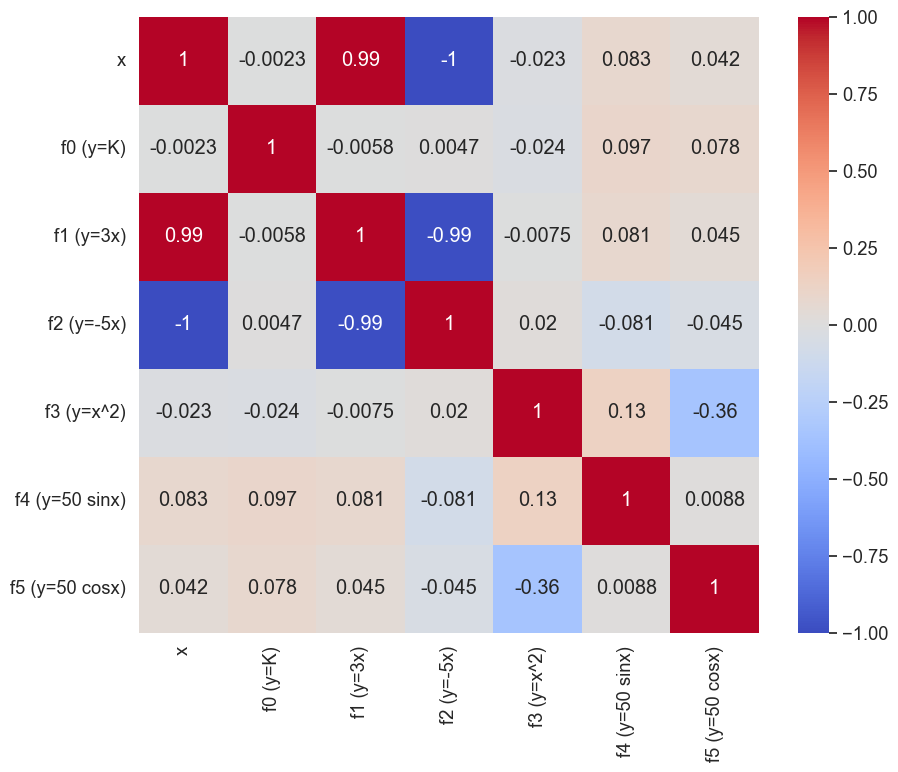

In [8]:
plt.figure(figsize = (10,8))
sns.set(font_scale=1.2)
_ = sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')

### B. régression linéaire avec scikit learn

In [9]:
dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
display(dfi)

from sklearn.linear_model import LinearRegression
pw = dfi["petal_width"].values.reshape(-1,1)
#print(pw.shape)
#print(pw)
pl = dfi["petal_length"].values
#print(pl.shape)
#print(pl)
# création de l'objet "régression linéaire"
fitlin = LinearRegression()

# recherche des paramètres du modèle linéaire
fitlin.fit(pw, pl)
pl_hat=fitlin.predict(pw)
a = fitlin.coef_
b = fitlin.intercept_
from sklearn.metrics import r2_score
r2 = r2_score(pl, pl_hat)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a[0], b, r2))
from sklearn.metrics import mean_squared_error as MSE
print()
from sklearn.metrics import mean_absolute_error as MAE
print("MSE ={:8.3f}\nMAE ={:8.3f}".format(MSE(pl,pl_hat), MAE(pl,pl_hat)))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


a   =   2.226
b   =   1.091
r^2 = 0.92690

MSE =   0.226
MAE =   0.368


### C. One-hot-encoding de la colonne "species"
On va ajouter des colonnes dans la base de données initiale. 

Cette préparation "amont" permet de simplifier ce TP en masquant cette difficulté (toute relative).

In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
#from keras.utils import np_utils

dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

# one-hot-encoding des espèces de y_train & y_test. 
# on utilise une fonction maison (y2c), qui elle-même appelle la fonction to_categorical de keras
# cette fonction est définie dans le package visualID importé au début ce ce notebook
uv = dfi["species"].unique()
print(f"Catégories uniques : {uv}") 
mapc2i = {}
for x in range(len(uv)):
    mapc2i[uv[x]] = x
print(f"Correspondance entre chaque catégorie unique et un entier : {mapc2i}")
species_ohe = t4pPC.y2c(mapc2i,dfi["species"])
#

print(f"Structure (shape) de species_ohe : {species_ohe.shape}")
display(species_ohe)
del mapc2i
dfi[uv]=pd.DataFrame(species_ohe)
display(dfi)
dfi.to_csv('./DS4B-iris-data/iris_ohe.csv',sep='\t',index=False)
del uv

2023-09-27 13:23:32.485960: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-27 13:23:32.488779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 13:23:32.567713: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 13:23:32.568520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 13:23:33.782554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Catégories uniques : ['setosa' 'versicolor' 'virginica']
Correspondance entre chaque catégorie unique et un entier : {'setosa': 0, 'versicolor': 1, 'virginica': 2}
Structure (shape) de species_ohe : (150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,0.0,0.0,1.0


### D. Régression linéaire avec un neurone (perceptron)
<div class="intro">
On va prédire la longueur d'un pétale, connaissant sa largeur. Un unique neurone est suffisant pour cela. C'est proche du <a href="https://fr.wikipedia.org/wiki/Perceptron">perceptron inventé par Rosenblatt en 1958</a>, sauf qu'ici on va optimiser poids et biais avec l'algortihme de rétropropagation, qui est plus récent et dont le principe a relancé l'intérêt des réseaux de neurones. Ca va aussi donner l'opportunité d'analyser la modélisation mathématique d'un neurone, résumée sur la figure ci-dessous :
<br><br>
<p style="text-align: center"><img width="350px" src="DS4B-svg/1neuron-perceptron-woBackP.png" style="margin-left:auto; margin-right:auto" id="img_perceptron"/></p>
    Le neurone reçoit l'information <i>x</i> en entrée et l'optimisation de la connexion neuronale entre lui et le neurone d'entrée (<i>w</i>) va lui permettre de reproduire aussi bien que possible la valeur à reproduire (<i>y</i>). Ce schéma d'optimisation est accompli pour l'ensemble des données d'apprentissage.
</div>

#### D.1. Chargement des données et des librairies

In [11]:
import numpy as np 
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from IPython.display import display


dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### D.2. Séparation des données 

In [12]:
data_train = dfi.sample(frac=0.8, axis='index') 
data_test  = dfi.drop(data_train.index)
x_train = data_train[['petal_width']]
y_train = data_train[['petal_length']]
x_test = data_test[['petal_width']]
y_test = data_test[['petal_length']]

#### D.3. Définition et entraînement du modèle
Errors calculated between the actual and predicted sepal_length values (noted $Y$ and $\hat{Y}$ in equations below)  
MAE =  Mean Absolute Error 
$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|\hat{Y}(x_{i})-Y(x_{i})\right|$$

MSE = Mean Squared Error  
$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left(\hat{Y}(x_{i})-Y(x_{i})\right)^{2}$$

In [13]:
def define_1ANN():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(1, name='iLayer'))
    model.add(keras.layers.Dense(1, name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
ANNmodel=define_1ANN()
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oLayer (Dense)              (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-09-27 13:23:50.372488: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/700
12/12 [==============================] - 1s 24ms/step - loss: 38.7448 - mae: 5.4898 - mse: 38.7448 - val_loss: 49.9155 - val_mae: 6.4367 - val_mse: 49.9155
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 38.4268 - mae: 5.4652 - mse: 38.4268 - val_loss: 49.5025 - val_mae: 6.4085 - val_mse: 49.5025
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 38.0980 - mae: 5.4399 - mse: 38.0980 - val_loss: 49.0958 - val_mae: 6.3806 - val_mse: 49.0958
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 37.7820 - mae: 5.4150 - mse: 37.7820 - val_loss: 48.6820 - val_mae: 6.3522 - val_mse: 48.6820
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 37.4538 - mae: 5.3896 - mse: 37.4538 - val_loss: 48.2817 - val_mae: 6.3245 - val_mse: 48.2817
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 37.1434 - mae: 5.3649 - mse: 37.1434 - val_loss: 47.8720 - val_mae: 6.2961 - val_mse: 47.87

#### D.4. Evaluation du modèle au cours de l'apprentissage

##### Erreurs en fin d'apprentissage

In [14]:
plt.rcParams["figure.figsize"] = (14,6)
EvTrain = ANNmodel.evaluate(x_train, y_train, verbose=0)
print(color.GREEN,color.GREEN,'x_train / loss      : {:5.4f}'.format(EvTrain[0]))
print('x_train/ mae       : {:5.4f}'.format(EvTrain[1]))
print('x_train / mse       : {:5.4f}'.format(EvTrain[2]),color.OFF)
print()
EvTest = ANNmodel.evaluate(x_test, y_test, verbose=0)
print(color.BLUE,color.BLUE,'x_test / loss      : {:5.4f}'.format(EvTest[0]))
print('x_test / mae       : {:5.4f}'.format(EvTest[1]))
print('x_test / mse       : {:5.4f}'.format(EvTest[2]),color.OFF)

  x_train / loss      : 0.2281
x_train/ mae       : 0.3840
x_train / mse       : 0.2281 

  x_test / loss      : 0.3487
x_test / mae       : 0.4944
x_test / mse       : 0.3487 


##### Evolution de l'erreur au cours des étapes d'apprentissage

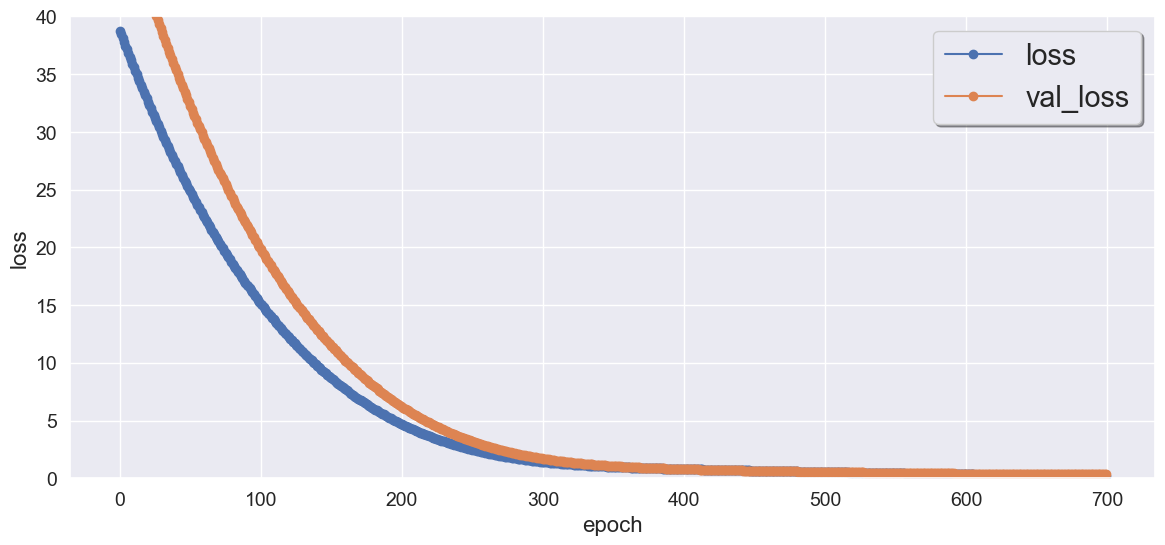

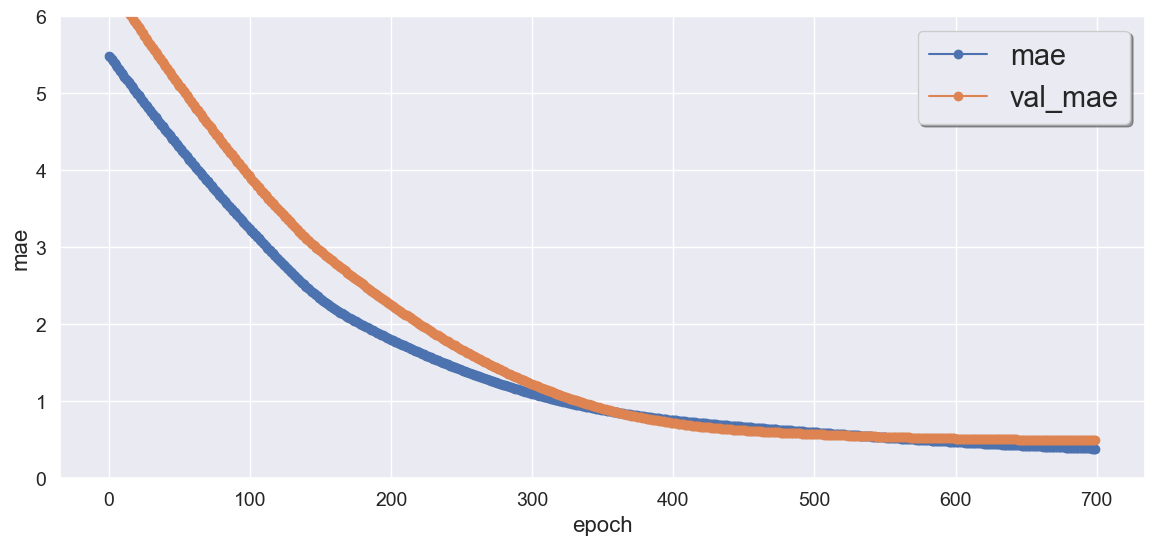

In [15]:
df=pd.DataFrame(data=ANNhistory.history)
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,40.0])
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')

figMAE=df.plot(y=["mae","val_mae"],linestyle='-', marker='o',fontsize=14)
figMAE.set_xlabel('epoch',fontdict={'fontsize':16})
figMAE.set_ylabel('mae',fontdict={'fontsize':16})
figMAE.set_ylim([0.0,6.0])
figMAE.legend(loc='upper right', shadow=True, fontsize='x-large')

##### Prédiction de la largeur des pétales (petal_length) en fonction de leur largeur (petal_width)

1/1 [==============================] - 0s 17ms/step


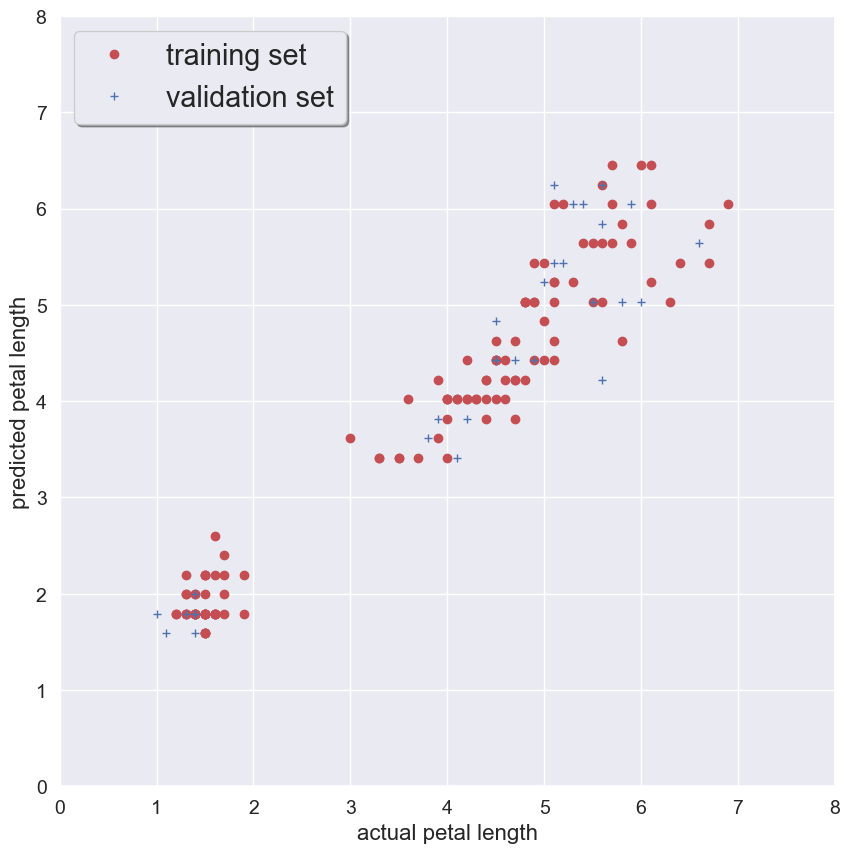

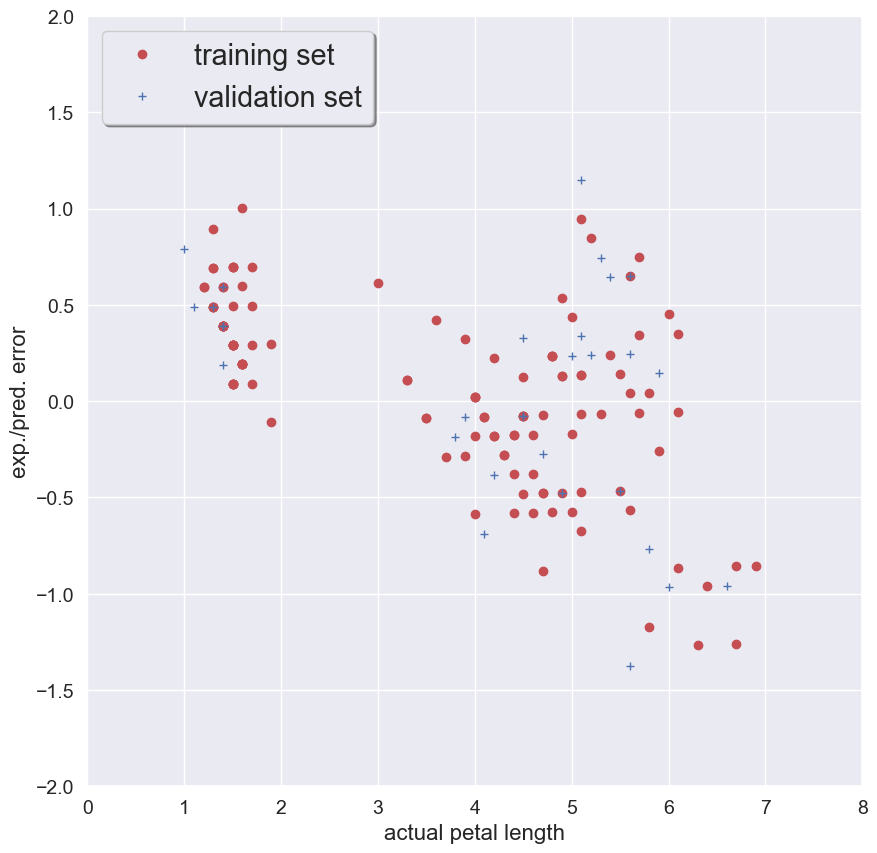

In [16]:
yhat_train=ANNmodel.predict(x_train)
yhat_test=ANNmodel.predict(x_test)
diffyt = yhat_train - y_train
diffyp = yhat_test - y_test
plt.rcParams["figure.figsize"] = (10,10)

maxL= 8.0
figP, axP = plt.subplots()
axP.plot(y_train,yhat_train,'ro',label='training set')
axP.plot(y_test,yhat_test,'b+',label='validation set')
axP.legend(loc='upper left', shadow=True, fontsize='x-large')
axP.set_xlim(0.0,maxL); axP.set_ylim(0.0,maxL)
axP.set_xlabel('actual petal length',fontsize=16)
axP.set_ylabel('predicted petal length',fontsize=16)
axP.tick_params(labelsize = 14)

figE, axE = plt.subplots()
axE.plot(y_train,diffyt,'ro',label='training set')
axE.plot(y_test,diffyp,'b+',label='validation set')
axE.legend(loc='upper left', shadow=True, fontsize='x-large')
axE.set_xlim(0.0,maxL); axE.set_ylim(-2,2)
axE.set_xlabel('actual petal length',fontsize=16)
axE.set_ylabel('exp./pred. error',fontsize=16)
axE.tick_params(labelsize = 14)

 Train. mean: 0.059    std: 0.474    MAE: 0.384     R2: 0.968
  Test. mean: 0.043    std: 0.589    MAE: 0.494     R2: 0.940


/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

[Text(0, 0.5, '')]

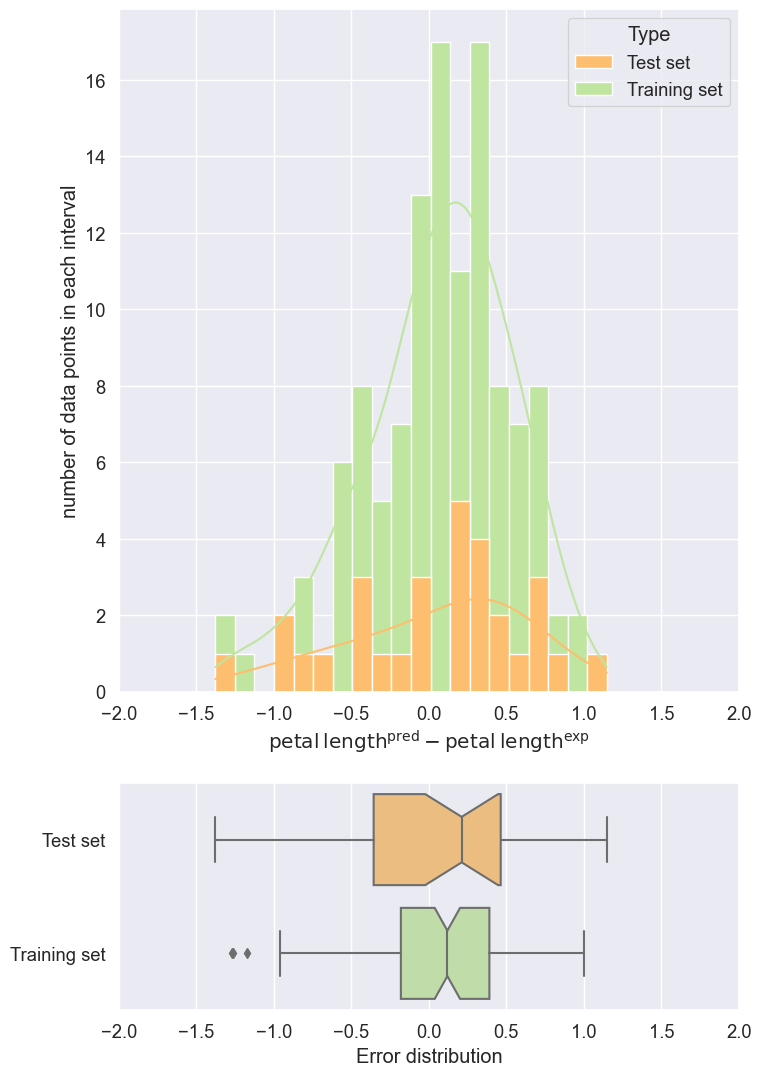

In [17]:
import seaborn as sns
from matplotlib import gridspec
print(color.BLUE,
      "Train.","mean: {:.3f}".format(np.mean(diffyt.values.ravel())),
      "   std: {:.3f}".format(np.std(diffyt.values.ravel())),
      "   MAE: {:.3f}".format(np.average(abs(diffyt.values.ravel()))),
      "    R2: {:.3f}".format(np.corrcoef(y_train.values.ravel(),yhat_train.ravel())[0,1])
     )
print(color.GREEN,
      " Test.","mean: {:.3f}".format(np.mean(diffyp.values.ravel())),
      "   std: {:.3f}".format(np.std(diffyp.values.ravel())),
      "   MAE: {:.3f}".format(np.average(abs(diffyp.values.ravel()))),
      "    R2: {:.3f}".format(np.corrcoef(y_test.values.ravel(),yhat_test.ravel())[0,1])
     )

# make a dataframe
df1 = pd.DataFrame(
    {
        "Error distribution": diffyp.values.ravel(),
        "Type": 'Test set'    },
)
df2 = pd.DataFrame(
    {
        "Error distribution": diffyt.values.ravel(),
        "Type": 'Training set'    },
)
distrib=pd.concat([df1,df2],ignore_index=True)

xlim=2.0
nbins=20
plt.rcParams["figure.figsize"] = (8,13) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (18) #on ajuste la taille des caractères
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
plt.subplot(gs[0])
fig1=sns.histplot(data=distrib,x="Error distribution", hue="Type", bins=nbins, kde=True, palette='Spectral', alpha=1.0)
plt.xlabel("$\mathrm{petal\:length}^{\mathrm{pred}}-\mathrm{petal\:length}^{\mathrm{exp}}$")
plt.ylabel("number of data points in each interval")
plt.xlim(-xlim,xlim)
plt.subplot(gs[1])
plt.xlim(-xlim,xlim)
fig2=sns.boxplot(data=distrib, x="Error distribution", y="Type", notch=True, orient = 'h',palette='Spectral')
fig2.set(ylabel=None)


##### Affichage des paramètres du modèle

In [18]:
print(f"{color.BOLD}{color.RED}Output Layer{color.OFF}")
print("w:",ANNmodel.layers[0].get_weights()[0])
print("b:",ANNmodel.layers[0].get_weights()[1])

Output Layer
w: [[2.0263433]]
b: [1.3854856]


#### D.5. Régression linéaire standard

In [19]:
from scipy.stats import linregress
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Erreur standard sur la valeur de la pente =   0.051
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.073


#### D.6. Représentation graphique régression linéaire vs. ANN

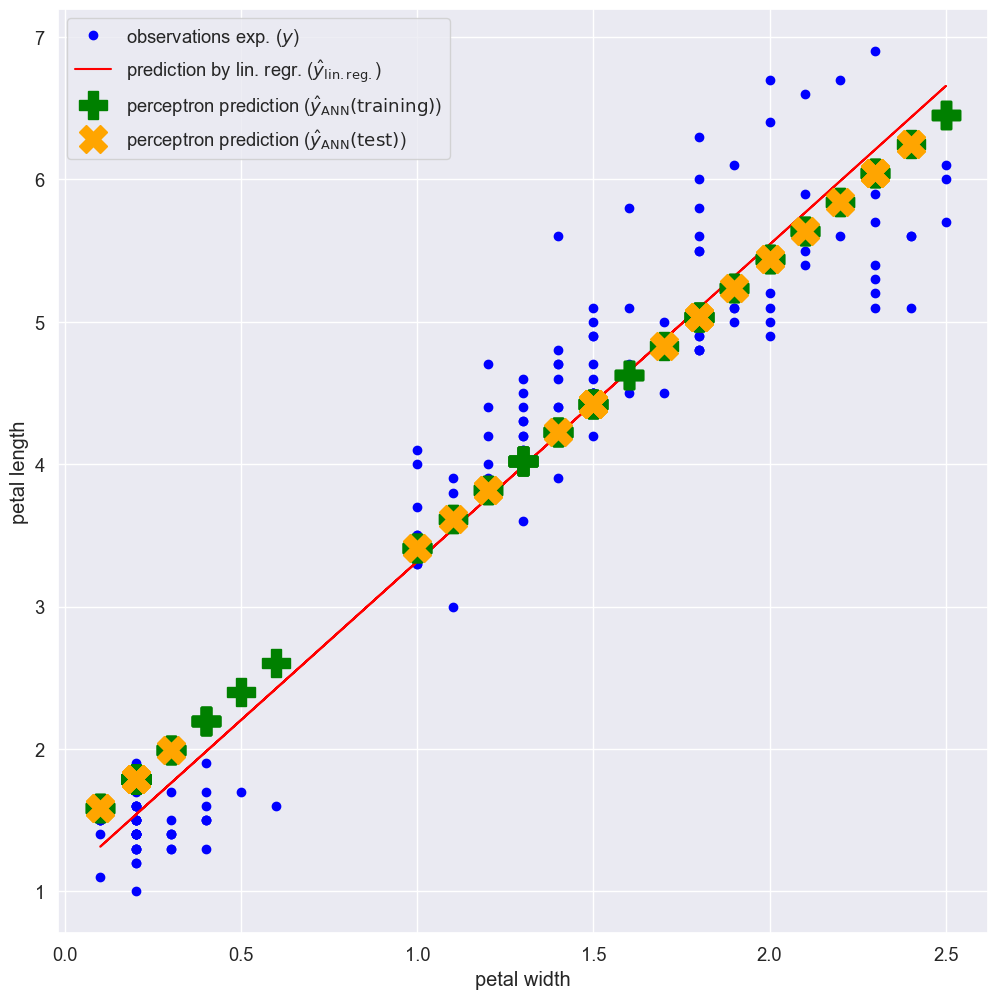

In [20]:
def y_hat(a,b,x):
    return a * x + b
# on calcule pl_hat la longueur prédite, pour chacune des largeurs (pw) mesurées expérimentalement
pl_hat = y_hat(a,b,pw)

plt.rcParams["figure.figsize"] = (12,12) #on ajuste la taille du graphique
plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plot(pw,pl_hat,color='red',label='prediction by lin. regr. ($\hat{y}_\mathrm{lin.reg.}$)')
plot(x_train, yhat_train,linestyle='', marker='P', markersize=20, color='green', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{training})$)')
plot(x_test, yhat_test,linestyle='', marker='X', markersize=20, color='orange', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{test})$)')
xlabel("petal width") # label de l'axe des abscisses
ylabel("petal length") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

### X. Divers pour l'élaboration du sujet (arrière-cuisine)

#### X.1. Tracé d'une fonction linéaire bruitée

,x,y
0,-1.099923,9.948356
1,9.692490,41.110394
2,-4.945082,-6.416557
3,4.721036,22.658123
4,6.242309,24.672258
...,...,...
95,-2.638707,6.929949
96,3.002480,19.449983
97,0.164960,11.347457
98,4.594267,20.994467


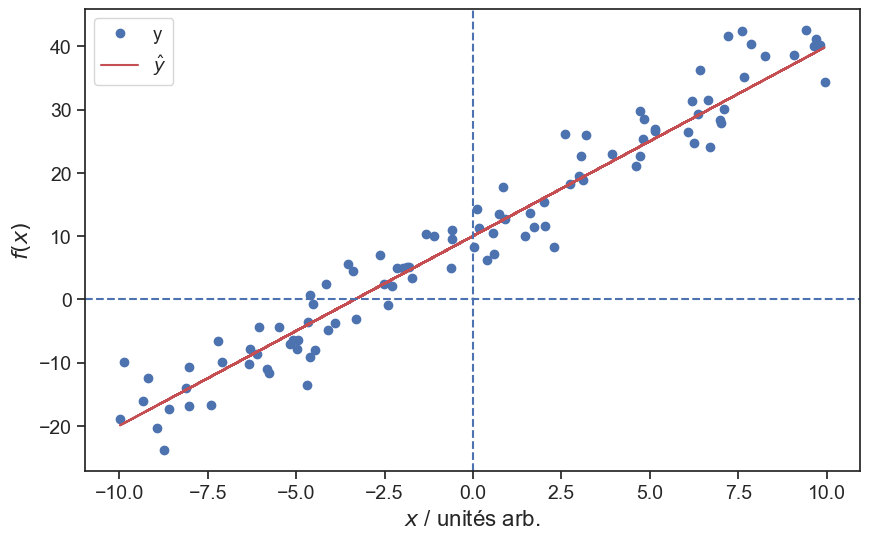

In [21]:
import numpy as np 
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
sns.set_style("ticks")

def noiseF(f, X, noise):
    N = noise * np.random.normal(0,1,nbp)
#    print(N)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 3*x+10

nbp = 100
xmin = -10
xmax = 10. 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
noisef1 = noiseF(f1,X,4)
f1tab = f1(X)
df1 = pd.DataFrame(noisef1, columns=['x','y'])
display(df1)
plt.rcParams["figure.figsize"] = (10,6)
axf1=df1.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf1.plot(X,f1tab,color='r',label='$\hat{y}$')
axf1.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf1.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf1.legend()
axf1.axvline(x = 0, color = 'b',linestyle='--')
axf1.axhline(y = 0, color = 'b',linestyle='--')
pngf1='DS4B-svg/fct1.png'
plt.savefig(pngf1,dpi=300,bbox_inches='tight',transparent=False)

#### X.2. Tracé d'une fonction quasi-linéaire bruitée

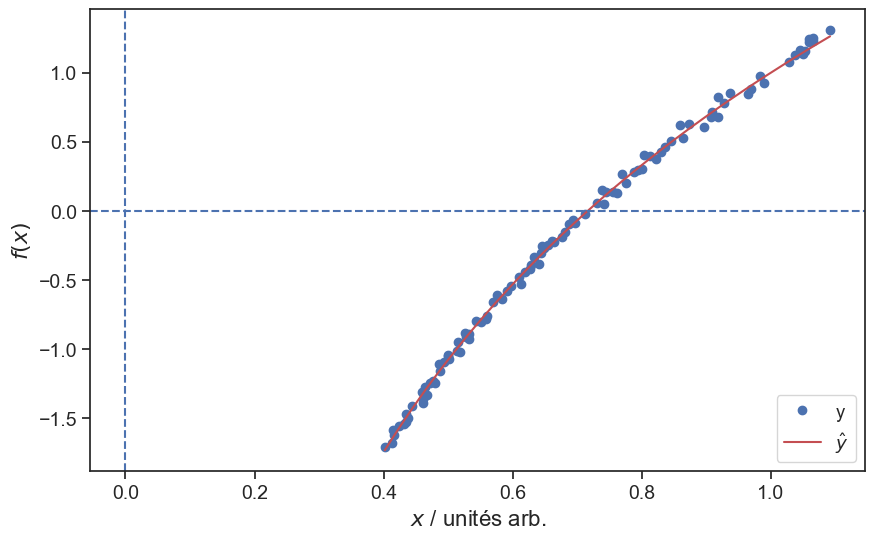

In [22]:
#exécuter d'abord le X.1
from numpy import log as ln
def f2(x):
    return 3*ln(x)+1

nbp = 100
xmin = 0.4
xmax = 1.1 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
index=np.argsort(X, axis=0)
noisef2 = noiseF(f2,X,0.04)
X=X[index]
noisef2=noisef2[index,:]
f2exact = f2(X)
df2 = pd.DataFrame(noisef2, columns=['x','y'])
plt.rcParams["figure.figsize"] = (10,6)
axf2=df2.plot(x="x", y=["y"],fontsize=14, linestyle='', marker='o')
axf2.plot(X,f2exact,color='r',label='$\hat{y}$')
axf2.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axf2.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axf2.legend()
axf2.axvline(x = 0, color = 'b',linestyle='--')
axf2.axhline(y = 0, color = 'b',linestyle='--')

np.savetxt('DS4B-iris-data/f2.csv', noisef2, delimiter="\t")

#### X.3. Tracé d'une fonction polynomiale bruitée

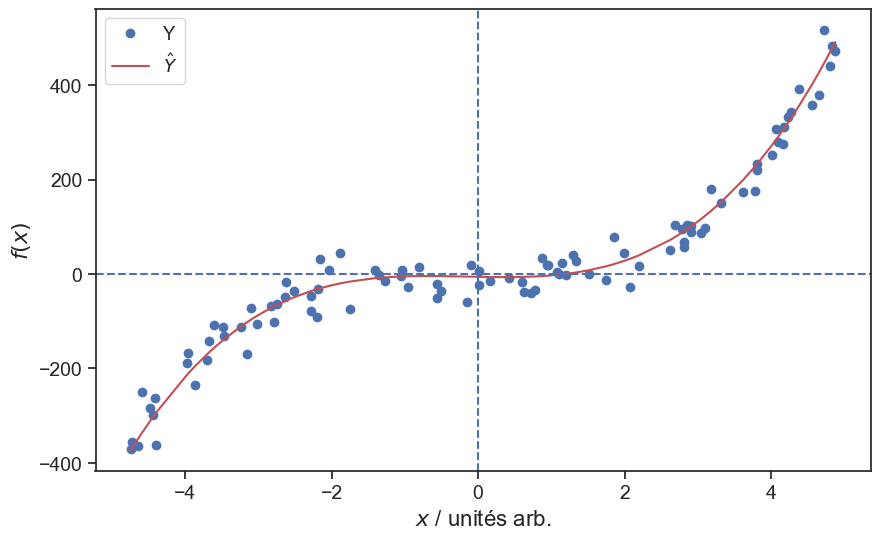

In [23]:
#exécuter d'abord le X.1
def fpol(x):
    return 4*x**3+2*x**2-3*x-6

nbp = 100
xmin = -5
xmax = 5 
# vecteur X
# random.uniform(low=0.0, high=1.0, size=None)
X = np.random.uniform(xmin,xmax,nbp)
index=np.argsort(X, axis=0)
X=X[index]
noisefpol = noiseF(fpol,X,30)
fpolexact = fpol(X)

dfpol = pd.DataFrame(noisefpol, columns=['X','Y'])
plt.rcParams["figure.figsize"] = (10,6)
axfpol=dfpol.plot(x="X", y=["Y"],fontsize=14, linestyle='', marker='o')
axfpol.plot(X,fpolexact,color='r',label='$\hat{Y}$')
axfpol.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axfpol.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axfpol.legend()
axfpol.axvline(x = 0, color = 'b',linestyle='--')
axfpol.axhline(y = 0, color = 'b',linestyle='--')
np.savetxt('DS4B-iris-data/fpol.csv', noisefpol, delimiter="\t")

#### X.4. Tracé de la même fonction polynomiale, sans bruit

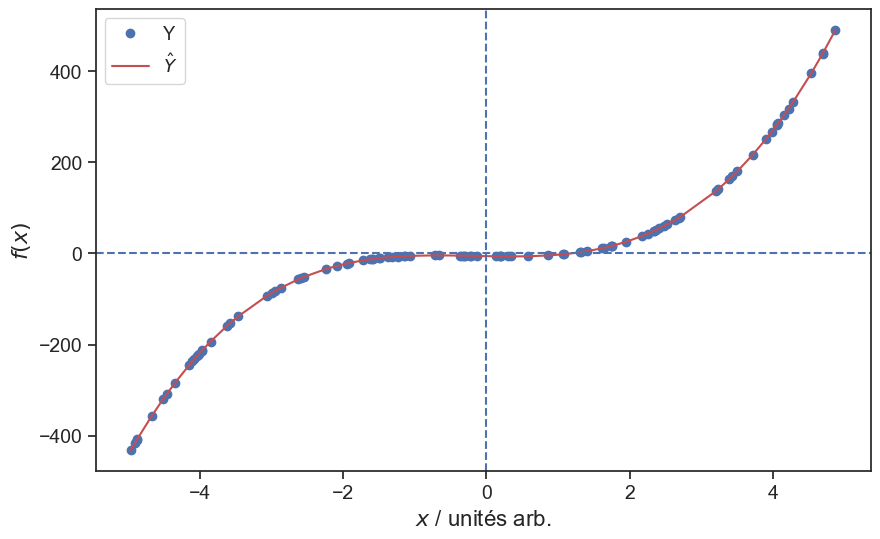

In [24]:
#exécuter d'abord le X.1, puis le X.3
X = np.random.uniform(xmin,xmax,nbp)
index=np.argsort(X, axis=0)
X=X[index]
nonoisefpol = noiseF(fpol,X,0)
fpolexact = fpol(X)

dfpol = pd.DataFrame(nonoisefpol, columns=['X','Y'])
plt.rcParams["figure.figsize"] = (10,6)
axfpol=dfpol.plot(x="X", y=["Y"],fontsize=14, linestyle='', marker='o')
axfpol.plot(X,fpolexact,color='r',label='$\hat{Y}$')
axfpol.set_xlabel('$x$ / unités arb.',fontdict={'fontsize':16})
axfpol.set_ylabel('$f(x)$',fontdict={'fontsize':16})
axfpol.legend()
axfpol.axvline(x = 0, color = 'b',linestyle='--')
axfpol.axhline(y = 0, color = 'b',linestyle='--')
np.savetxt('DS4B-iris-data/fpolNoNoise.csv', nonoisefpol, delimiter="\t")

#### X.5. Sauvegarde des jointplots & pairplots longueur/largeur

/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

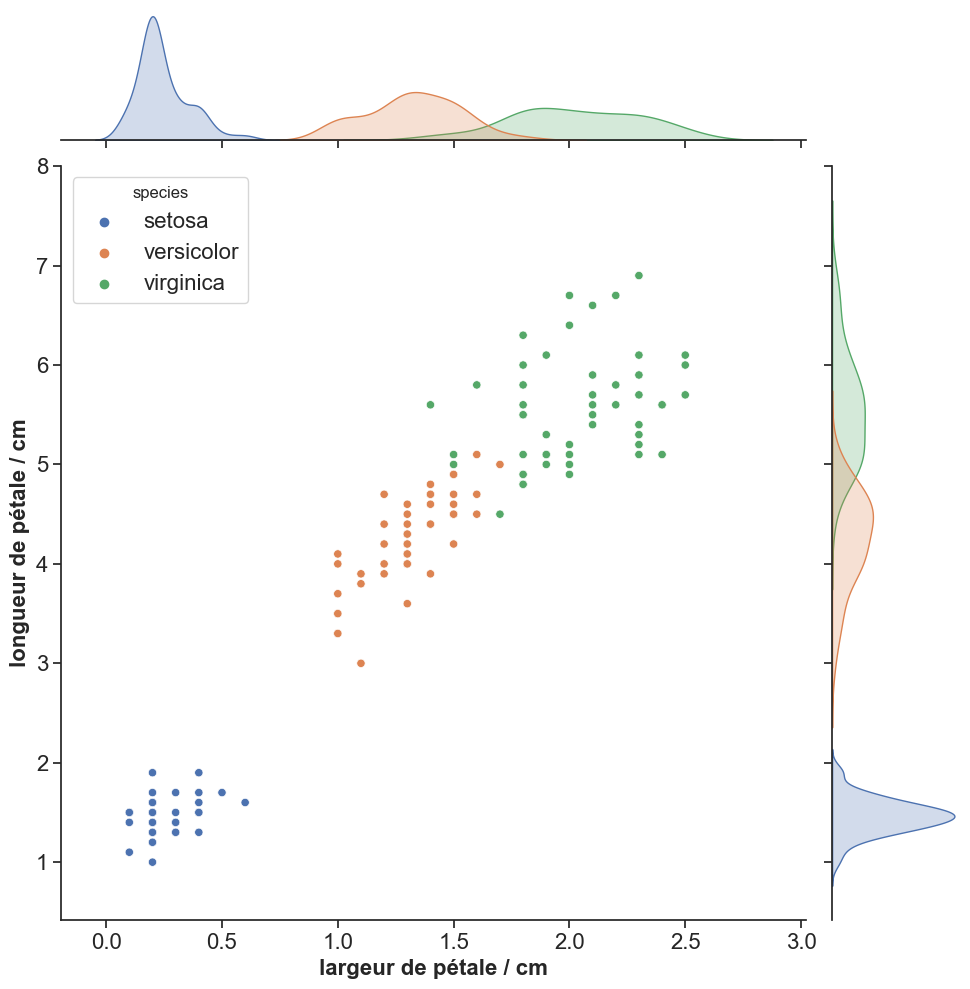

In [25]:
# importation de la libairie pandas
import pandas as pd
dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
plt.rcParams["axes.labelweight"] = "bold"
sns.set_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":20,"ytick.major.size":20})
sns.axes_style("whitegrid") 
g = sns.jointplot(x = "petal_width", y = "petal_length", data = dfi, hue='species', height=10, kind='scatter', joint_kws={"marker":'o'})
g.set_axis_labels("largeur de pétale / cm", "longueur de pétale / cm", fontsize=16)
plt.savefig('DS4B-svg/jointplot_petals.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

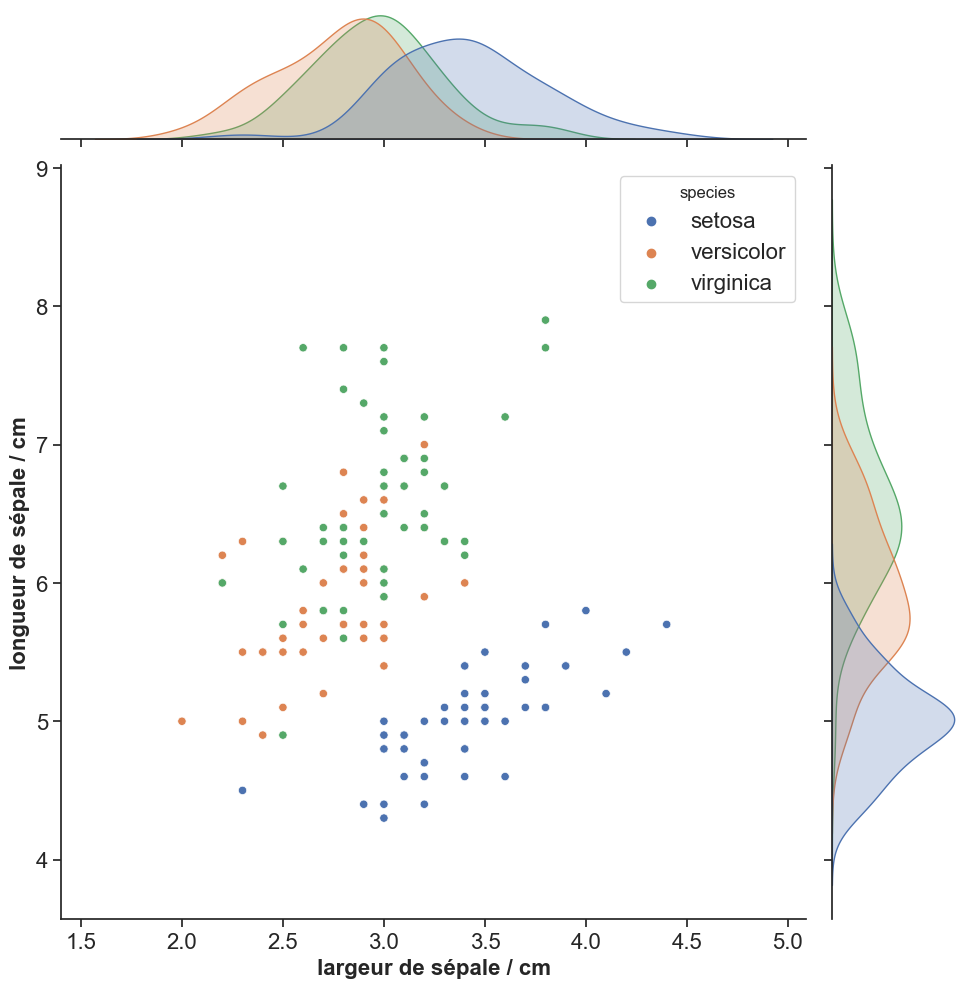

In [26]:
g = sns.jointplot(x = "sepal_width", y = "sepal_length", data = dfi, hue='species', height=10, kind='scatter', joint_kws={"marker":'o'})
g.set_axis_labels("largeur de sépale / cm", "longueur de sépale / cm", fontsize=16)
plt.savefig('DS4B-svg/jointplot_sepals.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

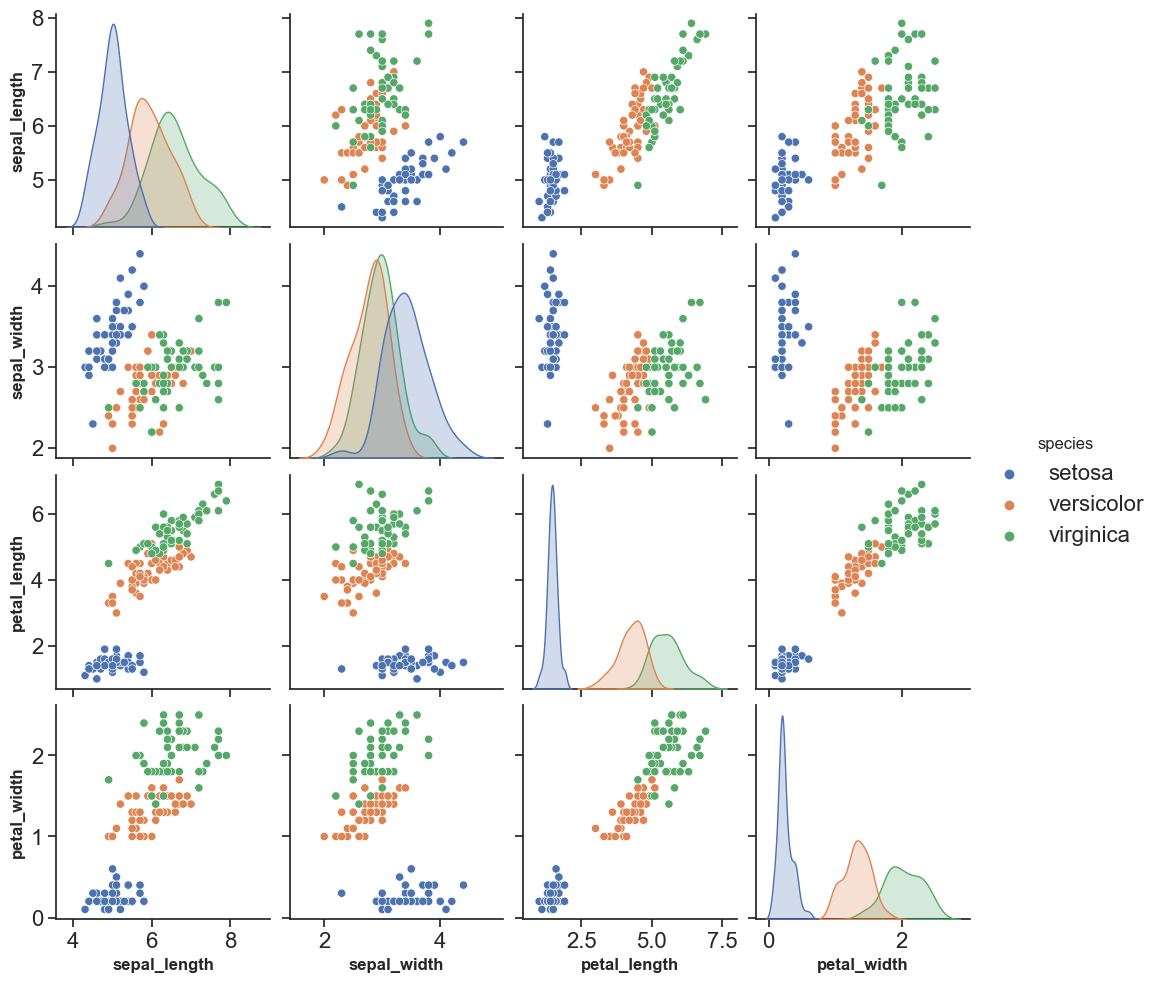

In [27]:
sns.pairplot(dfi,hue='species')
plt.savefig('DS4B-svg/pairplot_Iris.png',dpi=300,bbox_inches='tight',transparent=False)

In [28]:
vID.end(cwd0)

**End at:** Wednesday 27 September 2023, 13:24:40  
**Duration:** 00:01:27 269ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>